# AKA, Joy Divisionify your data!
### for fun and possibly science

So the other day I was analyzing some of my voltage oscillation data when a Joy Division song came on ("Shadowplay" if you're wondering) and their Unknown Pleasures cover art popped into my head. If you haven't seen it yet [you should](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=unknown%20pleasures%20cover). Of course, this also led down a Google hole in order to find the origin, which was made remarkably simple by [this great article](http://blogs.scientificamerican.com/sa-visual/pop-culture-pulsar-origin-story-of-joy-division-8217-s-unknown-pleasures-album-cover-video/) from Jen Christiansen for SciAm a few months back.

Anyway, it got me thinking. Could I use this sort of stacked graph to make a useful figure for my upcoming paper? Also, can I just straight Joy Divisionify my data? I mean, how cool would that be?

Turns out, it can be pretty damn cool. And since I needed the visualization practice anyway I decided to go ahead and write some code.

Note: I would like to one day do this with the KDEs of my data, but I couldn't figure out how to take the individual KDEs and manipulate them in such a way to make the resulting plot all that beautiful, so I scratched that idea for the time being.
UPDATE: I finally got around to playing around enough with KDEs to get comfortable with them enough to update this notebook. And I'm updating it HARD.

In [4]:
import neurphys as nu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
%matplotlib inline
plt.style.use('estep_style')

# Data
___
First, we're going to need some data (this particular dataset is derived from the same one I used in my signal processing notebook). 

This is just a simple 2D matrix of normalized histograms I made while analyzing neuronal voltage oscillations. 

In [6]:
df = nu.read_abf('/Users/chadestep/My_Stuff/python/example_data/2015_02_25_0003.abf')
df_epoch = nu.create_epoch(df, 2**15, 10e3)
df_kde = nu.epoch_kde(df_epoch, 'primary', -80, -30)

### Plot a few KDEs to see what we're dealing with

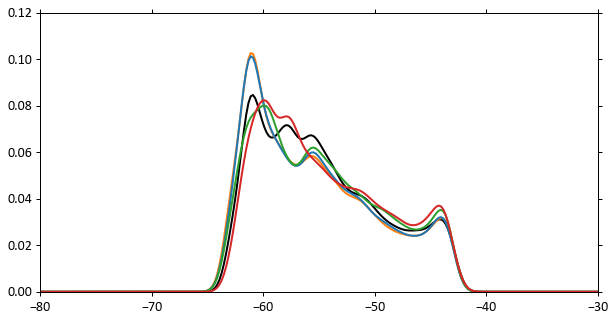

In [7]:
epochs = df_kde.index.levels[1]
for epoch in epochs[:5]:
    plt.plot(df_kde.ix['sweep001']['x'].xs(epoch),
             df_kde.ix['sweep001']['primary'].xs(epoch),
             lw=2)
plt.show()

Looks good. Now I just need to stack them, clean up the boarders, make sure the colors are correct, and we're good to go.

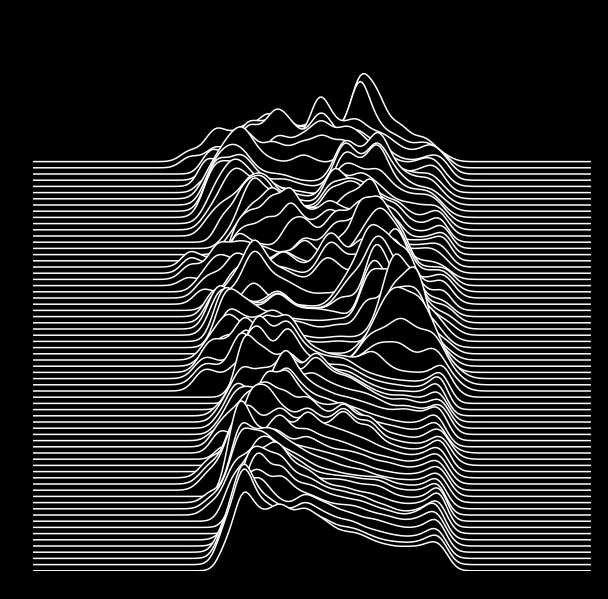

In [8]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('black')

epochs = df_kde.index.levels[1]

# Start at front (epoch001) and plot to back (epoch067)
for z, epoch in enumerate(epochs):
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc='black',ec='white',lw=1.5,closed=False,zorder=-z,alpha=1))

# Start at back (epoch001) and plot to front (epoch067)
# for z, epoch in enumerate(epochs):
#     ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
#                                df_kde.ix['sweep001']['primary'].xs(epoch) - z/100],
#                                fc='black',ec='white',lw=1,closed=False,zorder=z,alpha=1))

ax.axis('off')
ax.autoscale_view()
plt.show()

# What about inverting the colors?
___

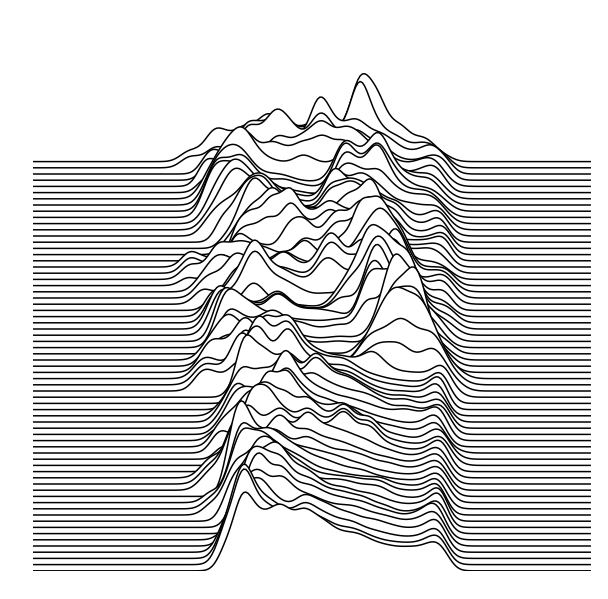

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('white')

epochs = df_kde.index.levels[1]

for z, epoch in enumerate(epochs):
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc='white',ec='black',lw=1.5,closed=False,zorder=-z,alpha=1))
ax.axis('off')
ax.autoscale_view()
plt.show()

# Playing around with the plot a little bit
Because why not?

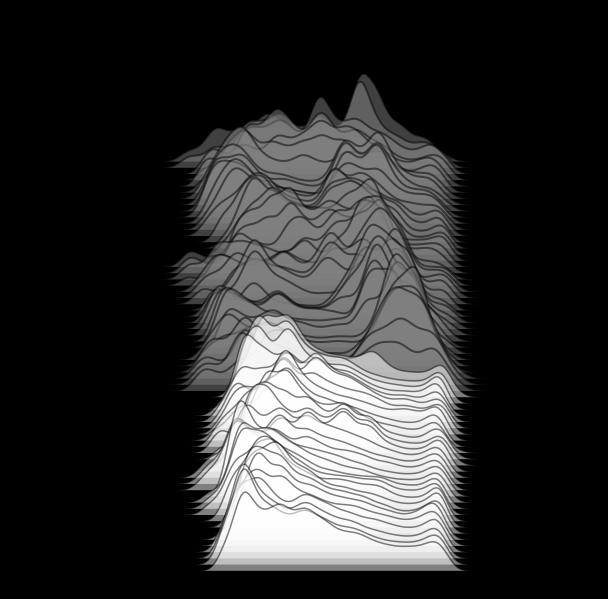

In [10]:
# something happens at epoch 28, so lets change the color at that spot
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('black')

epochs = df_kde.index.levels[1]
new_z = len(epochs)  
x = np.arange(-0.99,0,0.01)

for z, epoch in enumerate(epochs):
    if z <= 28:
        ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                                   df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                                   fc='white',ec='black',lw=1.5,closed=False,zorder=-z,alpha=0.5))
    else:
        ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                                   df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                                   fc='grey',ec='black',lw=2,closed=False,zorder=-z,alpha=0.5))
ax.axis('off')
ax.autoscale_view()
plt.show()

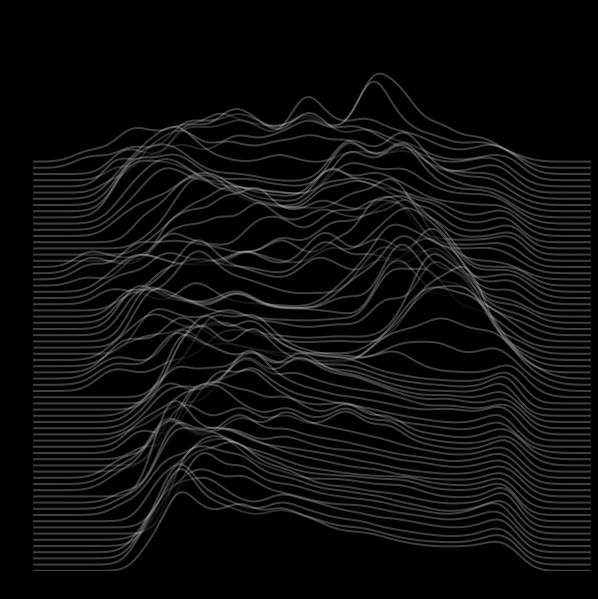

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('black')

epochs = df_kde.index.levels[1]

for z, epoch in enumerate(epochs):
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc='black',ec='white',lw=2,closed=False,zorder=-z,alpha=0.25))

ax.set_xlim(-69,-39) # stretch it and center a little bit
ax.axis('off')
ax.autoscale_view()
plt.show()

In [119]:
# fig, ax = plt.subplots(1, figsize=(10,10))
# fig.patch.set_facecolor('white')

# epochs = df_kde.index.levels[1]

# # Start at front (epoch001) and plot to back (epoch067)
# for z, epoch in enumerate(epochs):
#     ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
#                                df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
#                                fc='black',ec='white',lw=1.5,closed=False,zorder=-z,alpha=0.1))
# ax.axis('off')
# ax.autoscale_view()
# plt.show()

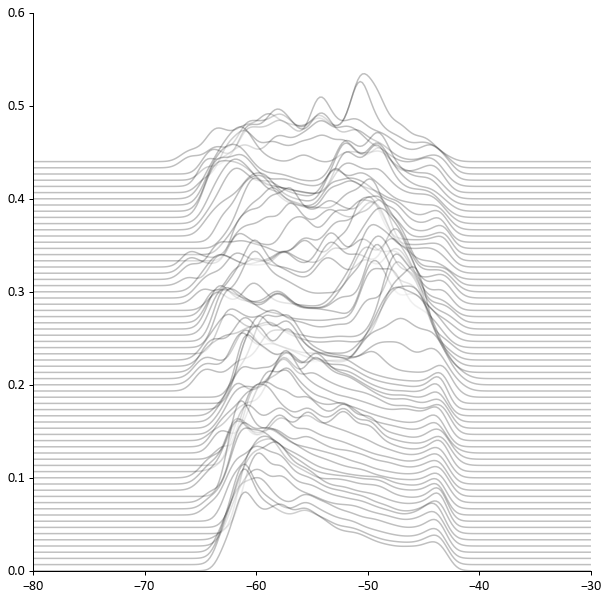

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('white')

epochs = df_kde.index.levels[1]

for z, epoch in enumerate(epochs):
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc='white',ec='black',lw=1.5,closed=False,zorder=-z,alpha=0.25))
# If I want to see the x-axis then I have to manually clean up the boarders
# ax.axis('off')
nu.simple_axis(ax)
ax.autoscale_view()
plt.show()

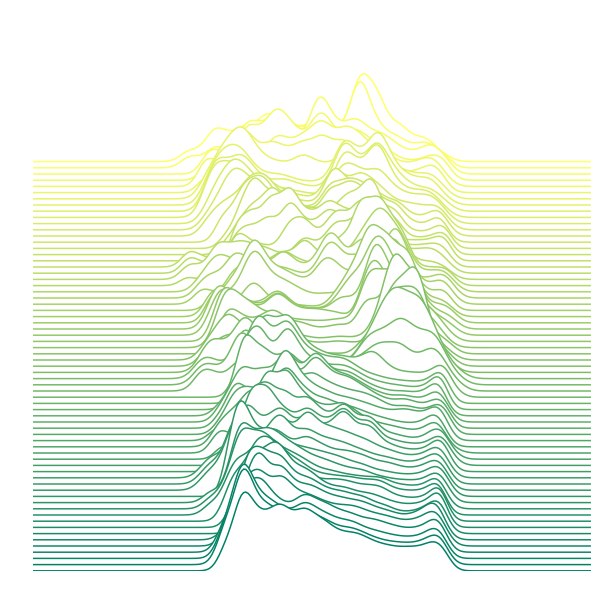

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('white')

epochs = df_kde.index.levels[1]
color_idx = np.linspace(0,1,len(epochs))

for z, epoch in enumerate(epochs):
    color = plt.cm.summer(color_idx[z])
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc='white',ec=color,lw=1.5,closed=False,zorder=-z,alpha=1))
ax.axis('off')
ax.autoscale_view()
plt.show()

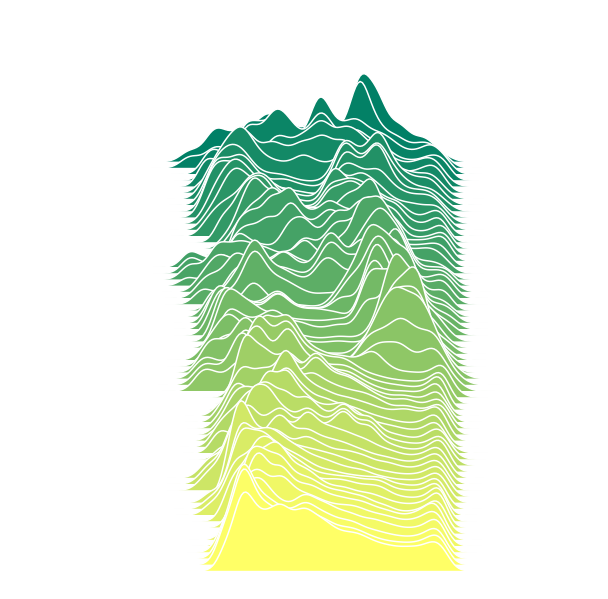

In [15]:
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('white')

epochs = df_kde.index.levels[1]
color_idx = np.linspace(0,1,len(epochs))
color_idx = color_idx[::-1]

for z, epoch in enumerate(epochs):
    color = plt.cm.summer(color_idx[z])
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc=color,ec='white',lw=1.5,closed=False,zorder=-z,alpha=1))
ax.axis('off')
ax.autoscale_view()
plt.show()

# What about color coding based on the peak voltage?

In [16]:
print(df_kde.ix['sweep001']['primary'].xs('epoch001').idxmax())
print(df_kde.ix['sweep001']['primary'].xs('epoch004').idxmax())

95
100


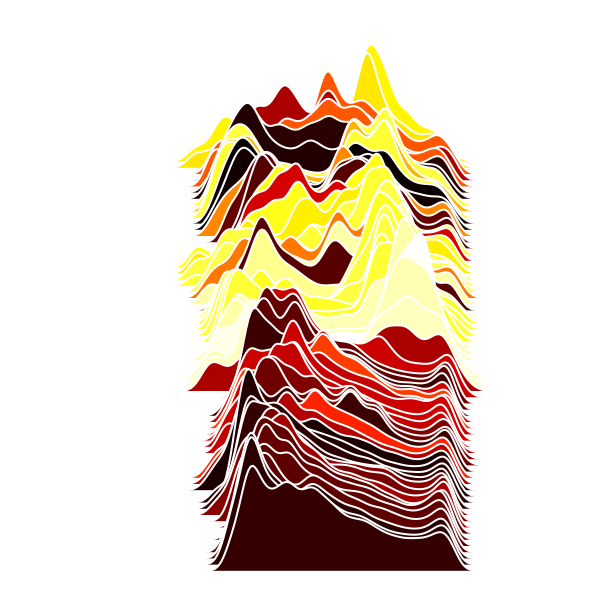

In [17]:
epochs = df_kde.index.levels[1]

# pull the indicies of all the peak KDE voltage for each epoch in the first sweep of data
idx_array = [df_kde.ix['sweep001']['primary'].xs(epoch).idxmax() for epoch in epochs]

# convert indicies to a range(0,1) (can I do it it one line?)
idx_array = idx_array-min(idx_array)
idx_array = idx_array/max(idx_array)
color_idx = idx_array

fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('white')

for z, epoch in enumerate(epochs):
    color = plt.cm.hot(color_idx[z])
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/200],
                               fc=color,ec='white',lw=2,closed=False,zorder=-z,alpha=1))
# ax.set_xlim(-70,-40)
ax.axis('off')
ax.autoscale_view()
plt.show()

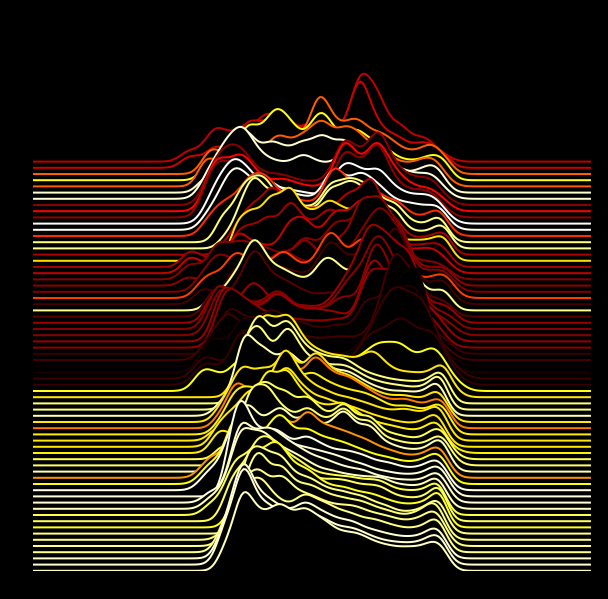

In [18]:
# Reverse the colorscheme (if custom or '<color>_r' isn't available)
fig, ax = plt.subplots(1, figsize=(10,10))
fig.patch.set_facecolor('black')

epochs = df_kde.index.levels[1]
color_idx = abs(idx_array-1)

for z, epoch in enumerate(epochs):
    color = plt.cm.hot(color_idx[z])
    ax.add_patch(Polygon(np.c_[df_kde.ix['sweep001']['x'].xs(epoch),
                               df_kde.ix['sweep001']['primary'].xs(epoch) + z/150],
                               fc='black',ec=color,lw=2,closed=False,zorder=-z,alpha=1))
ax.axis('off')
ax.autoscale_view()
plt.show()